# Multiple Linear Regression 
Goal
Produce the best fit plane that willl minimize loss function for our dataset



y = b0 +b1X1 +b2X2 + ...+bnXn

In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
dataset = pd.read_csv('50_Startup.csv')

In [6]:
dataset.head()

,R&D Spend,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,NewYork,182901.99
4,142107.34,91391.34,366168.42,Florida,166187.94


In [7]:
X = dataset.iloc[: , :-1].values
y = dataset.iloc[:, :-1].values

In [8]:
X

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'NewYork'],
       [142107.34, 91391.34, 366168.42, 'Florida']], dtype=object)

In [9]:
y

array([[165349.2, 136897.8, 471784.1, 'New York'],
       [162597.7, 151377.59, 443898.53, 'California'],
       [153441.51, 101145.55, 407934.54, 'Florida'],
       [144372.41, 118671.85, 383199.62, 'NewYork'],
       [142107.34, 91391.34, 366168.42, 'Florida']], dtype=object)

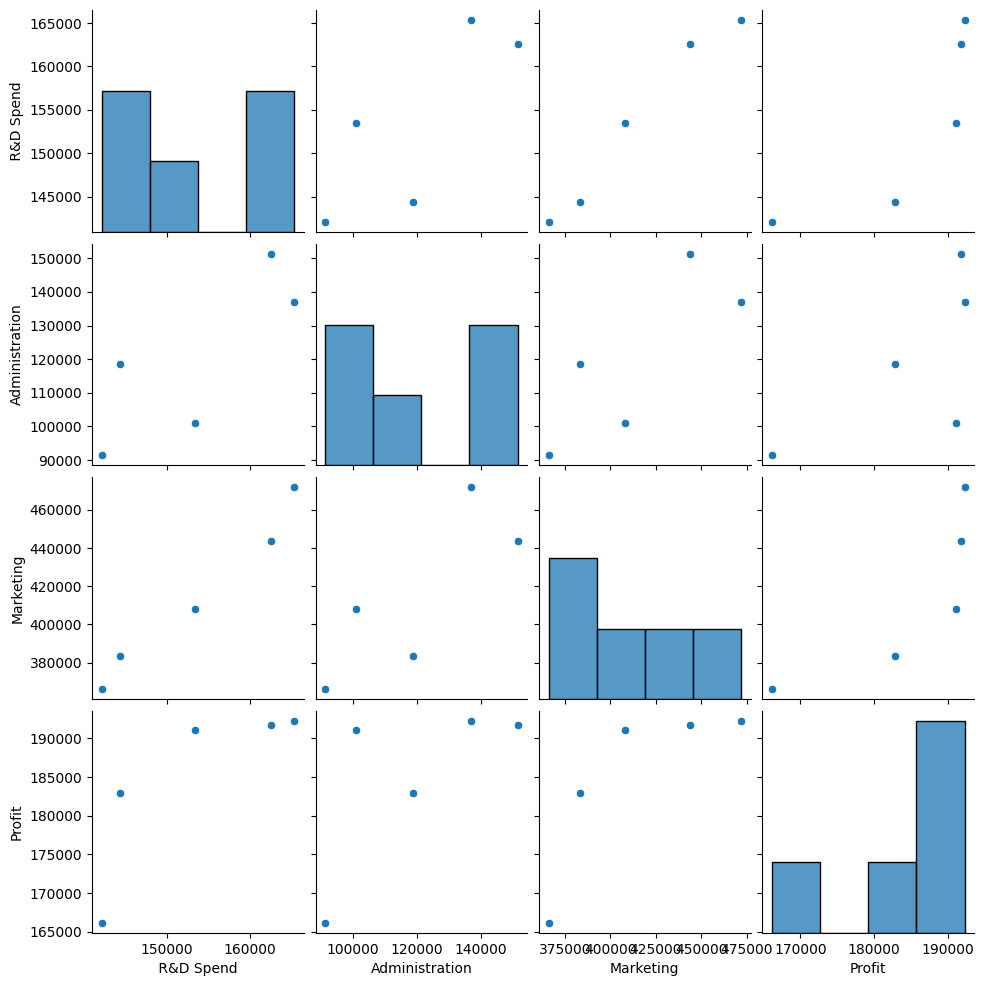

In [10]:
sns.pairplot(dataset)

In [11]:
# categorical to convert  
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [38]:
ct = ColumnTransformer(transformers= [('encoder', OneHotEncoder() , [3])], remainder= "passthrough")

In [31]:
X = np.array(ct.fit_transform(X))

In [39]:
y = np.array(ct.fit_transform(y))

In [40]:
y

array([[0.0, 0.0, 1.0, 0.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 0.0, 142107.34, 91391.34, 366168.42]], dtype=object)

In [32]:
X

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 136897.8,
        471784.1],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 151377.59,
        443898.53],
       [1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 101145.55,
        407934.54],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 118671.85,
        383199.62],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 91391.34,
        366168.42]], dtype=object)

In [41]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test = train_test_split(X,y ,test_size = 0.2 , random_state= 0)

In [42]:
X_test

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 101145.55,
        407934.54]], dtype=object)

In [43]:
X_train

array([[1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 136897.8,
        471784.1],
       [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 151377.59,
        443898.53],
       [1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 118671.85,
        383199.62],
       [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 91391.34,
        366168.42]], dtype=object)

In [44]:
y_train

array([[0.0, 0.0, 1.0, 0.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 0.0, 0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [0.0, 1.0, 0.0, 0.0, 142107.34, 91391.34, 366168.42]], dtype=object)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train , y_train)

LinearRegression()

In [47]:
y_pred = regressor.predict(X_test)
y_pred

array([[-1.62334562e-01,  8.13137495e-01,  5.46790569e-01,
        -1.97593502e-01,  1.51041913e+05,  1.01145550e+05,
         4.07934540e+05]])

In [48]:
y_test

array([[0.0, 1.0, 0.0, 0.0, 153441.51, 101145.55, 407934.54]],
      dtype=object)

In [52]:
# np.set_printoptions(precision = 2)
# y_pred = y_pred.reshape(len(y_pred),1)

Profit = 

In [53]:
print(regressor.coef_)
print(regressor.intercept_)

[[-1.17e-01  1.17e-01  9.98e-02 -1.56e-01  0.00e+00 -6.12e-02  1.17e-01
   9.98e-02 -6.12e-02 -1.56e-01  2.30e-05 -6.88e-06]
 [-9.98e-02  9.98e-02  8.49e-02 -1.33e-01  0.00e+00 -5.21e-02  9.98e-02
   8.49e-02 -5.21e-02 -1.33e-01 -2.25e-05  2.80e-06]
 [ 6.12e-02 -6.12e-02 -5.21e-02  8.14e-02  0.00e+00  3.19e-02 -6.12e-02
  -5.21e-02  3.19e-02  8.14e-02 -2.01e-05  1.65e-05]
 [ 1.56e-01 -1.56e-01 -1.33e-01  2.07e-01  0.00e+00  8.14e-02 -1.56e-01
  -1.33e-01  8.14e-02  2.07e-01  1.95e-05 -1.25e-05]
 [-6.28e+02  6.28e+02  5.34e+02 -8.35e+02  0.00e+00 -3.28e+02  6.28e+02
   5.34e+02 -3.28e+02 -8.35e+02  4.90e-02  2.15e-01]
 [-2.30e-05  2.30e-05 -2.25e-05  1.95e-05  0.00e+00 -2.01e-05  2.30e-05
  -2.25e-05 -2.01e-05  1.95e-05  1.00e+00  1.75e-09]
 [ 6.88e-06 -6.88e-06  2.80e-06 -1.25e-05  0.00e+00  1.65e-05 -6.88e-06
   2.80e-06  1.65e-05 -1.25e-05  1.75e-09  1.00e+00]]
[ 3.31e-01  1.96e+00 -4.18e+00  2.89e+00  5.84e+04 -1.93e-04  1.99e-04]
